In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,MaxPool2D
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.optimizers import RMSprop
from keras.utils.np_utils import to_categorical

In [2]:
train_df = pd.read_csv('train.csv',sep=',')
test_df = pd.read_csv('test.csv', sep = ',')

In [3]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_df.shape, test_df.shape

((42000, 785), (28000, 784))

In [6]:
train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype='float32')

In [7]:
x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data/255

y_test=test_data[:,0]

In [8]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12)

x_train.shape, x_validate.shape, x_test.shape, y_train.shape, y_validate.shape, y_test.shape

((33600, 784), (8400, 784), (28000, 784), (33600,), (8400,), (28000,))

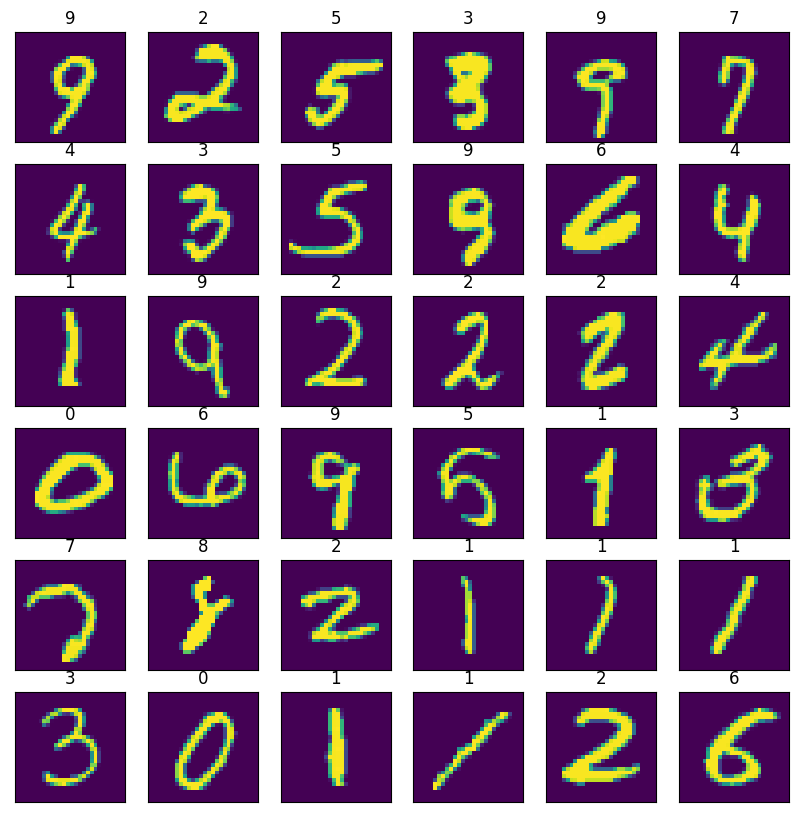

In [9]:
class_names = [0,1,2,3,4,5,6,7,8,9]
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

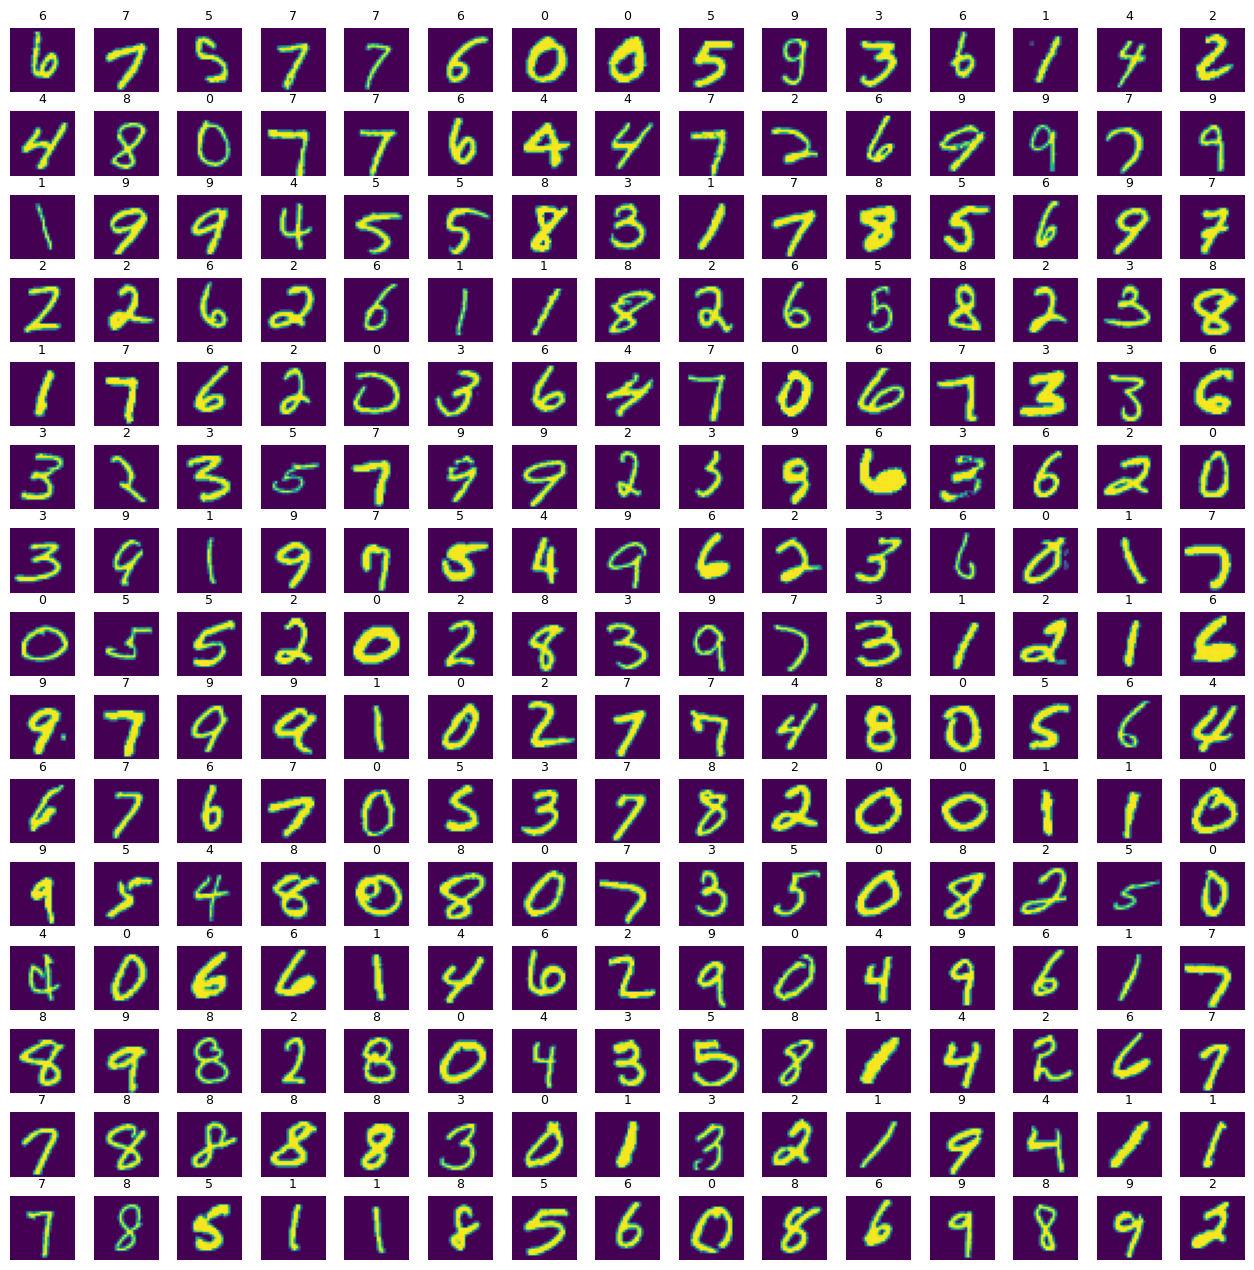

In [10]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_data) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train_data[index,1:].reshape((28,28)) )
    labelindex = int(train_data[index,0])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

In [11]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1) 

In [12]:
x_train.shape

(33600, 784)

In [13]:
x_test.shape

(28000, 784)

In [14]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [16]:
x_train.shape,x_test.shape, y_train.shape,y_test.shape,x_validate.shape,y_validate.shape

((33600, 28, 28, 1),
 (28000, 28, 28, 1),
 (33600,),
 (28000,),
 (8400, 28, 28, 1),
 (8400,))

In [23]:
#Lets build a model with 2 Hidden Layers
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(5000,activation="relu"))
model.add(keras.layers.Dense(3000,activation="relu"))
model.add(Dropout(0.25))
model.add(keras.layers.Dense(1000,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(10,activation="softmax"))

In [24]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 5000)              3925000   
                                                                 
 dense_7 (Dense)             (None, 3000)              15003000  
                                                                 
 dropout (Dropout)           (None, 3000)              0         
                                                                 
 dense_8 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_9 (Dense)             (None, 100)               100100    
                                                                 
 dropout_1 (Dropout)         (None, 100)              

In [25]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [26]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [27]:
history = model.fit(x_train,y_train,epochs=200,validation_data=(x_validate,y_validate),callbacks=[es])

Epoch 1/200
1050/1050 [==============================] - 5s 4ms/step - loss: 0.8109 - accuracy: 0.7652 - val_loss: 0.2898 - val_accuracy: 0.9170
Epoch 2/200
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3350 - accuracy: 0.9055 - val_loss: 0.2084 - val_accuracy: 0.9398
Epoch 3/200
1050/1050 [==============================] - 4s 3ms/step - loss: 0.2542 - accuracy: 0.9283 - val_loss: 0.1720 - val_accuracy: 0.9492
Epoch 4/200
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2009 - accuracy: 0.9429 - val_loss: 0.1464 - val_accuracy: 0.9552
Epoch 5/200
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1700 - accuracy: 0.9521 - val_loss: 0.1333 - val_accuracy: 0.9592
Epoch 6/200
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1466 - accuracy: 0.9586 - val_loss: 0.1182 - val_accuracy: 0.9631
Epoch 7/200
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1243 - accuracy: 0.9644 - val_loss: 0.1123 - val_ac

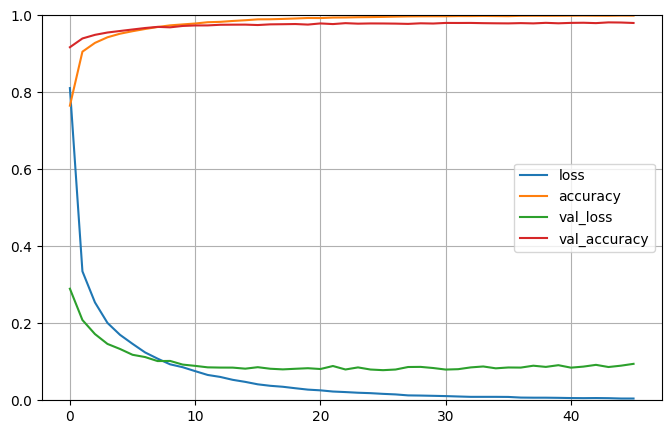

In [28]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [29]:
score = model.evaluate(x_validate,y_validate,verbose=0)
print('Validation Loss : {:.4f}'.format(score[0]))
print('Validation Accuracy : {:.4f}'.format(score[1]))

Validation Loss : 0.0946
Validation Accuracy : 0.9800


In [30]:
# we test our model on just 15 images from the test set
X_new = x_test[:15]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 80ms/step


array([[0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.04, 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.94],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.

In [31]:
y_pred = np.argmax(y_proba,axis=1)
y_pred

array([2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4], dtype=int64)

In [32]:
np.array(class_names)[y_pred]

array([2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4])

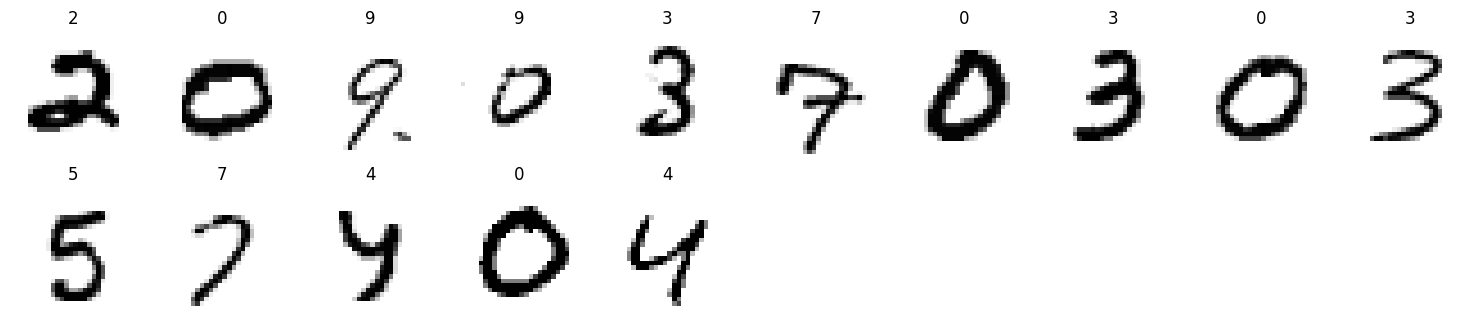

In [33]:
plt.figure(figsize=(15,8))
for i in range(15):
    plt.subplot(5,10,i+1)
    plt.imshow(X_new[i].reshape((28,28)),cmap='binary')
    plt.axis("off")
    plt.title(class_names[y_pred[i]])
plt.tight_layout()
plt.show()

For submission

In [34]:
prediction = model.predict(x_test)
pred_real = np.argmax(prediction,axis=1)
output = pd.DataFrame({"ImageId":test_df.index+1,"Label":pred_real})
output.to_csv('submission-2.csv',index=False)

875/875 [==============================] - 1s 1ms/step
